# Time Series Modeling

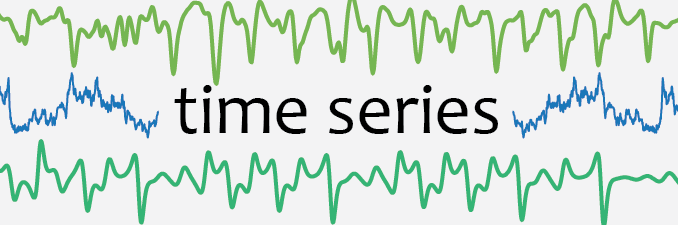

## Agenda:
- Components of time series data
- Stationarity
- ACF and PACF
- Fitting the Model
- Evaluating the Model


### What is Time Series?
- A time series is a sequential set of data points, measured typically over successive times.

- **Time series forecasting is the use of a model to predict future values based on previously observed values.**

#### Reference
- https://otexts.com/fpp2/

## **Why Can't We Use Linear Regression Techniques?**

**There are four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:**

- Linearity and additivity of the relationship between dependent and independent variables:

- Statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

-  Homoscedasticity (constant variance) of the errors

- Normality of the error distribution.

## The Basic Steps in a Forecasting Task

A forecasting task usually involves five basic steps.


**Step 1: Problem definition.**  
- Often this is the most difficult part of forecasting. 
- Defining the problem carefully requires an understanding of the way the forecasts will be used, who requires the forecasts, and how the forecasting function fits within the organisation requiring the forecasts.
- A forecaster needs to spend time talking to everyone who will be involved in collecting data, maintaining databases, and using the forecasts for future planning.

**Step 2: Gathering information.** . 
There are always at least two kinds of information required:   
- Statistical data  
- The accumulated expertise of the people who collect the data and use the forecasts. 

**Step 3: Preliminary (exploratory) analysis.**
- Always start by graphing the data. 
- Are there consistent patterns? 
- Is there a significant trend? 
- Is seasonality important? 
- Is there evidence of the presence of business cycles? 
- Are there any outliers in the data that need to be explained by those with expert knowledge? - How strong are the relationships among the variables available for analysis?

**Step 4: Choosing and fitting models.**
- The best model to use depends on the availability of historical data, the strength of relationships between the forecast variable and any explanatory variables, and the way in which the forecasts are to be used. 
- Common to compare two or three potential models. 

**Step 5: Using and evaluating a forecasting model.**
- Once a model has been selected and its parameters estimated, the model is used to make forecasts. 
- The performance of the model can only be properly evaluated after the data for the forecast period have become available.

### Components of Time Series Data
A time series is affected by four main components, which can be separated from the observed data. These components are: *Trend, Cyclical, Seasonal and Irregular* components.

- **Trend** : The long term movement of a time series. For example, series relating to population growth, number of houses in a city etc. show upward trend.
- **Seasonality** : Fluctuation in the data set that follow a regular pattern due to outside influences. For example sales of ice-cream increase in summer, or daily web traffic.
- **Cyclical** : When data exhibit rises and falls that are not of fixed period.  Think of business cycles which usually last several years, but where the length of the current cycle is unknown beforehand.
- **Irregrular**: Are caused by unpredictable influences, which are not regular and also do not repeat in a particular pattern. These variations are caused by incidences such as war, strike, earthquake, flood, revolution, etc. There is no defined statistical technique for measuring random fluctuations in a time series.


*Note: Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of fixed period then they are cyclic; if the period is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.*

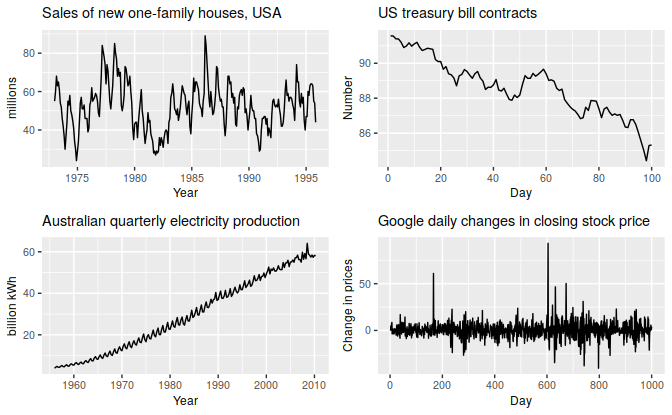

- The monthly housing sales (top left) show strong seasonality within each year, as well as some strong cyclic behaviour with a period of about 6–10 years. There is no apparent trend in the data over this period.
- The US treasury bill contracts (top right) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is no seasonality, but an obvious downward trend. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.
- The Australian quarterly electricity production (bottom left) shows a strong increasing trend, with strong seasonality. There is no evidence of any cyclic behaviour here.
- The daily change in the Google closing stock price (bottom right) has no trend, seasonality or cyclic behaviour. There are random fluctuations which do not appear to be very predictable, and no strong patterns that would help with developing a forecasting model.

### Statistical stationarity: 

A **stationary time series** is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. 
- Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!  

### Visualizing Homoscedasticity:
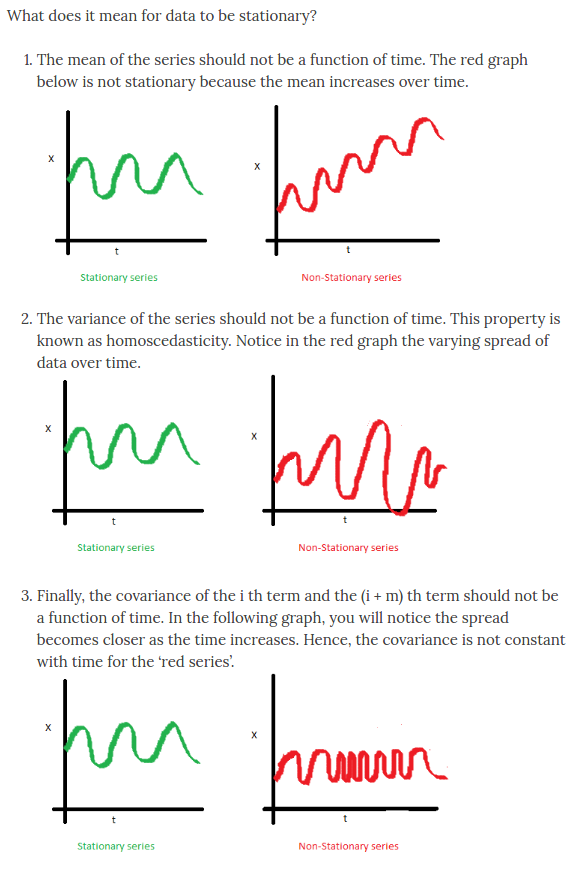

## Two ways to check for stationarity

1. **Plot rolling Statistics**

    We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.
    
    
2. **Dickey-Fuller Test**:
    This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

### Model Considerations
- Many time series include trend, cycles and seasonality. 

- When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.

# Modeling

[AirPassengerDataSet](https://www.kaggle.com/rakannimer/air-passengers)

In [15]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [159]:
# Now, we will load the data set and look at some initial rows and data types of the columns:
df = pd.read_csv('AirPassengers.csv')

# The data contains a particular month and number of passengers travelling in that month. 
#In order to read the data as a time series,
#we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                 index_col='Month',date_parser=dateparse)


In [160]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [162]:
ts = df['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

## Check Stationarity 
- **Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time.


- **Dickey-Fuller Test:** This is one of the statistical tests for checking stationarity. 


    - The null hypothesis is that the TS is non-stationary. 
    - The test result gives us a Test Statistic and some Critical Values for different confidence levels. 
    - If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.


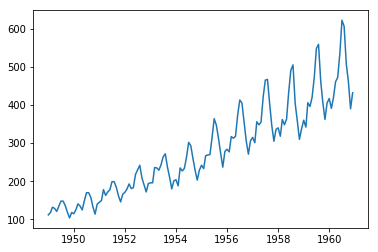

In [155]:
plt.plot(df)
plt.show()

In [156]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

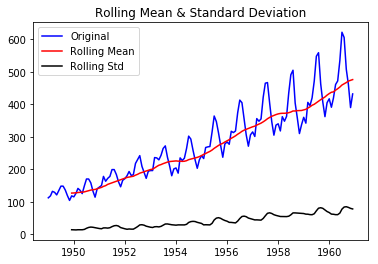

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [140]:
test_stationarity(ts)

### Making a Time Series Stationary
- Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
- Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

**Goal is to model or estimate the trend and seasonality in the series and remove them from the series to get a stationary series we can apply forecasting techniques on.**

### Transformation
- Transformations such as logarithms can help to stabilise the variance of a time series. 
- log, square root, cube root, etc.

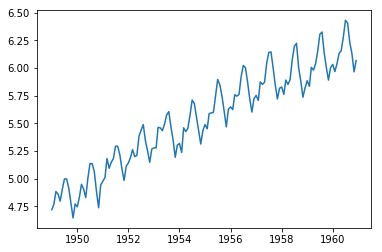

In [163]:
# Exponential
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

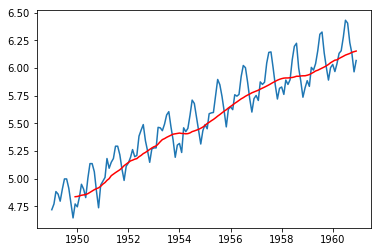

In [165]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [166]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

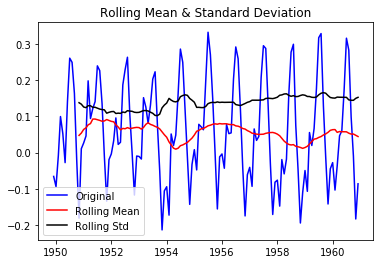

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [171]:
# remove trend from series and check stationarity:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

- The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

### Exponentially Weighted Moving Average  
- Weights are assigned to all the previous values with a decay factor.
- ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

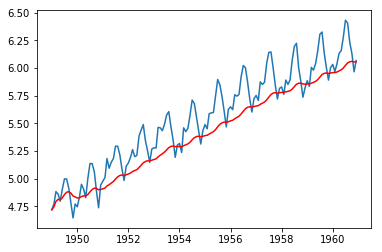

In [169]:
expwighted_avg =ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

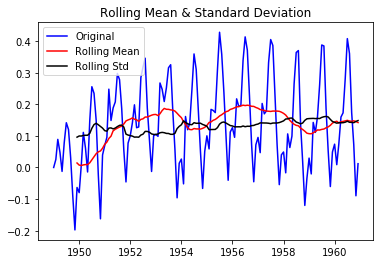

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [170]:
# remove trend from series and check stationarity:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

- Less variation in mean and standard deviation. 
- The test statistic is smaller than the 1% critical value, which is better than the previous case.

## Eliminating Trend and Seasonality


- 1. Differencing – taking the differece with a particular time lag. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality
- 2. Decomposition – modeling both trend and seasonality and removing them from the model.


### Differncing
- Take the difference of the observation at a particular instant with that at the previous instant. 
- Works well in improving stationarity. 

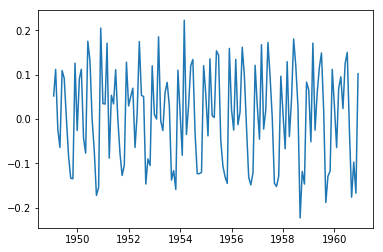

In [117]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

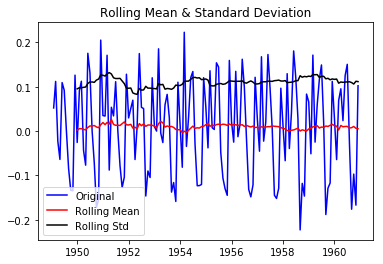

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [118]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

-  Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. 

## Decomposing
- In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

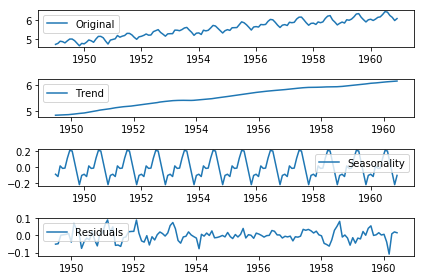

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

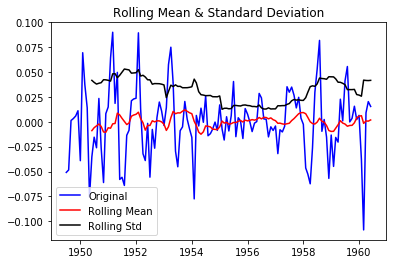

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [120]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

- The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. 

## Forecasting a Time Series


### ARIMA. 
- ARIMA stands for Auto-Regressive Integrated Moving Averages. 


- The predictors depend on the parameters (p,d,q) of the ARIMA model:


- **AR (Auto-Regressive) terms (p):** AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).


- **MA (Moving Average) terms (q):** MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.


- **Number of Differences (d):** These are the number of nonseasonal differences.

#### How to determine the value of ‘p’ and ‘q’. 
- We use two plots to determine these numbers. 

**Autocorrelation Function (ACF):** It is a measure of the correlation between the the time series with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).


**Partial Autocorrelation Function (PACF):** This measures the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.


In [121]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [122]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

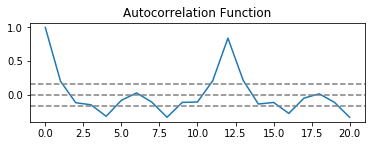

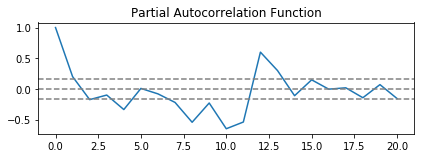

In [123]:
#Plot ACF: 
plt.subplot(211) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(212)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:**

- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

## ARIMA Modeling

### AR Model

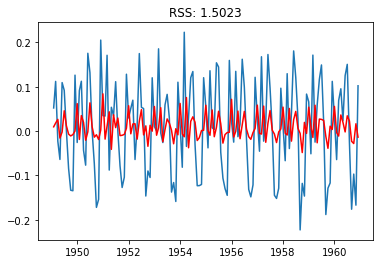

In [124]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()

### MA Model

Text(0.5, 1.0, 'RSS: 1.4721')

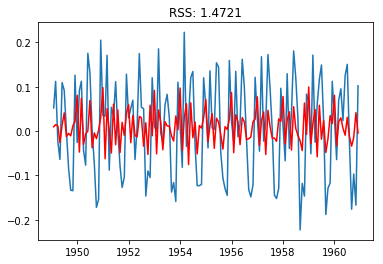

In [125]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Combined Model

Text(0.5, 1.0, 'RSS: 1.0292')

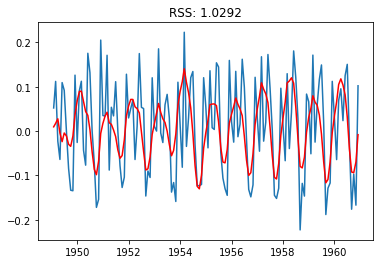

In [126]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

- Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. 

### Convert to original scale


In [127]:
# store the predicted results as a separate series 
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [128]:
# The way to convert the differencing to log scale is to add these differences consecutively to the base number. 
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [129]:
# Next need to add them to base number. 
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

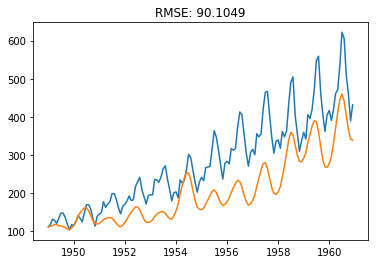

In [130]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.show()

# Alternatives
[STUMPY](https://github.com/TDAmeritrade/stumpy)


[PROPHET](https://facebook.github.io/prophet/)

[LTSM](https://github.com/nicodjimenez/lstm)